# Prism Data

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import re

In [2]:
inflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-inflows.pqt')

In [3]:
outflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-outflows.pqt')

In [4]:
inflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER


In [5]:
outflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


## Data Exploration

*inflows*

In [6]:
inflows['prism_consumer_id'].nunique()

2974

In [7]:
inflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [8]:
inflows[inflows['memo'] == inflows['category']]

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [9]:
len(inflows)

513115

In [10]:
inflows['memo'].nunique()

14

In [11]:

inflows['category'].nunique()

14

**Number of unique merchants in each category**

In [12]:
 inflows[['category','memo']].groupby('category').nunique()

,memo
category,
DEPOSIT,1
EXTERNAL_TRANSFER,1
INSURANCE,1
INVESTMENT_INCOME,1
LOAN,1
MISCELLANEOUS,1
OTHER_BENEFITS,1
PAYCHECK,1
PAYCHECK_PLACEHOLDER,1


*outflows*

In [13]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                    320998
AUTOMOTIVE                                                                           208579
ATM_CASH                                                                             117651
UNCATEGORIZED                                                                        117409
LOAN                                                                                  90945
                                                                                      ...  
Par Gators Dockside -                                                                     1
Chilis Mandarin                                                                           1
Chilis Bay Meadows                                                                        1
Southside Liquor                                                                          1
POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS RD MESA AZ  Card 15 #XXXX  MC

In [14]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

In [15]:
outflows[outflows['category'] == 'BILLS_UTILITIES']['memo'].unique()

array(['BILLS_UTILITIES'], dtype=object)

**Uncategorized Category**

In [16]:
outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [17]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


In [18]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                    320998
AUTOMOTIVE                                                                           208579
ATM_CASH                                                                             117651
UNCATEGORIZED                                                                        117409
LOAN                                                                                  90945
                                                                                      ...  
Par Gators Dockside -                                                                     1
Chilis Mandarin                                                                           1
Chilis Bay Meadows                                                                        1
Southside Liquor                                                                          1
POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS RD MESA AZ  Card 15 #XXXX  MC

In [19]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

In [20]:

outflows[outflows['category'] == 'BILLS_UTILITIES']['memo'].unique()

array(['BILLS_UTILITIES'], dtype=object)

**Uncategorized Transactions**

In [21]:

outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [22]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


In [23]:
# double checking 

# outflows[outflows['category']=='TAX']

In [24]:
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [25]:
merchant_df = outflows[outflows['category'].isin(merchant_cat)][['category','memo']].reset_index()
merchant_df

,index,category,memo
0,2,FOOD_AND_BEVERAGES,TST* Casa Del Rio - Exp Fairlawn OH 09/24
1,4,FOOD_AND_BEVERAGES,Buffalo Wild Wings
2,6,GENERAL_MERCHANDISE,Oculus CA 04/16
3,7,FOOD_AND_BEVERAGES,LOS GIRASOLES STOW OH 03/08
4,8,GENERAL_MERCHANDISE,BUZZIS LAUNDRY 1 OH 03/28
...,...,...,...
1306447,2597457,GENERAL_MERCHANDISE,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...
1306448,2597462,EDUCATION,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...
1306449,2597465,FOOD_AND_BEVERAGES,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...
1306450,2597468,FOOD_AND_BEVERAGES,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...


In [26]:
merchant_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                                                     
TRAVEL              Uber                                                 7989
                    Uber Eats                                            5691
                    Lyft                                                 4648
RENT                SOUTHERN INVESTO WEB PMTS                              47
                    NEWREZ-SHELLPOIN WEB PMTS XXXXXXXXXX WEB ID: XX...     37
                    CHECKCARD XXXX GRACELAND RENTAL XXX-XXXXXXX KY ...     30
PETS                PetSmart                                             1450
                    CHEWY.COM                                             255
                    Pet Supplies Plus                                     228
OVERDRAFT           Overdraft Item Fee                                    374
                    OVERDRAFT ITEM CHARGE                                 191
                    OVERDRAFT PROTECTION TO XXXXXXXXXXXXXX                180
MORTGAGE            HUNTINGTON MORTG ONLINE PMT XXXXXX                     52
                    FREEDOM MTG PYMTS                                      45
                    WELLS FARGO HOME MORTGAGE Bill Payment                 35
GROCERIES           Walmart                                             31619
                    Kroger                                               8423
                    Target                                               8343
GENERAL_MERCHANDISE Amazon                                              31725
                    7-Eleven                                            11675
                    Circle K                                            10148
FOOD_AND_BEVERAGES  McDonald's                                          22670
                    Starbucks                                           12777
                    Chick-fil-A                                          7933
EDUCATION           Teacherspayteachers.com                                90
                    CHECKCARD XXXX BETMGM PLAY+ LAS VEGAS NV XXXXXX...     82
                    Mms University Of Maryl                                59

## Chosen Categories(5)

- **FOOD_AND_BEVERAGES**
- **GENERAL_MERCHANDISE**
- **GROCERIES**
- **PETS**
- **TRAVEL**

In [27]:
chosen_cat = ['FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'PETS', 'TRAVEL']

In [28]:
chosen_df = outflows[outflows['category'].isin(chosen_cat)][['category','memo']].reset_index()
chosen_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                    
TRAVEL              Uber                7989
                    Uber Eats           5691
                    Lyft                4648
PETS                PetSmart            1450
                    CHEWY.COM            255
                    Pet Supplies Plus    228
GROCERIES           Walmart            31619
                    Kroger              8423
                    Target              8343
GENERAL_MERCHANDISE Amazon             31725
                    7-Eleven           11675
                    Circle K           10148
FOOD_AND_BEVERAGES  McDonald's         22670
                    Starbucks          12777
                    Chick-fil-A         7933

 ***Most Common Merchants by Category (Top 3)***

- **`TRAVEL`** :`Uber, Uber Eats, Lyft`
-  **`PETS`**  : `PetSmart, CHEWY.COM, Pet Supplies Plus`
- **`GROCERIES`** : `Walmart, Kroger, Target`
- **`GENERAL_MERCHANDISE`**: `Amazon, 7-Eleven, Circle K`
- **`FOOD_AND_BEVERAGES`** : `McDonald's, Starbucks, Chick-fil-a`

## Train-Test Split 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [31]:
inflows_consumers = inflows['prism_consumer_id'].unique()
inflows_consumers

array([   0,    2,    4, ..., 5939, 5940, 5941])

In [32]:
in_train_users, in_test_users = train_test_split(inflows_consumers, test_size=0.2)#, random_state=42)
len(in_train_users), len(in_test_users)

(2379, 595)

In [33]:
595/2379

0.25010508617065996

In [34]:
in_train_df = inflows[inflows['prism_consumer_id'].isin(in_train_users)]
in_test_df = inflows[inflows['prism_consumer_id'].isin(in_test_users)]

In [35]:
in_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [36]:
in_test_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
91,2,acc_3,DEPOSIT,19.00,2021-04-08,DEPOSIT
92,2,acc_3,SELF_TRANSFER,250.00,2021-08-30,SELF_TRANSFER
93,2,acc_3,SELF_TRANSFER,1000.00,2021-10-06,SELF_TRANSFER
94,2,acc_3,SELF_TRANSFER,300.00,2021-08-09,SELF_TRANSFER
95,2,acc_3,SELF_TRANSFER,300.00,2021-11-03,SELF_TRANSFER
...,...,...,...,...,...,...
511989,5929,acc_9512,PAYCHECK,743.44,2022-12-28,PAYCHECK
511990,5929,acc_9512,PAYCHECK,728.89,2023-01-10,PAYCHECK
511991,5929,acc_9512,DEPOSIT,10.00,2023-01-13,DEPOSIT
511992,5929,acc_9512,PAYCHECK,728.89,2023-01-24,PAYCHECK


In [37]:
len(in_train_df), len(in_test_df)

(411578, 101537)

In [38]:
99026/414089

0.2391418269985438

In [39]:
in_train_df.groupby('prism_consumer_id').size().mean(), in_test_df.groupby('prism_consumer_id').size().mean()

(173.00462379150903, 170.65042016806723)

In [40]:
in_train_df['amount'].mean(), in_test_df['amount'].mean()

(692.3539667329158, 906.3477374750092)

In [41]:

in_train_df['amount'].median(), in_test_df['amount'].median()

(100.0, 100.0)

*outflows*

In [42]:
outflows_consumers = outflows['prism_consumer_id'].unique()
outflows_consumers 


array([   0,    2,    4, ..., 5939, 5940, 5941])

In [43]:
out_train_users, out_test_users = train_test_split(outflows_consumers, test_size=0.2, random_state=42)
len(out_train_users), len(out_test_users)

(2374, 594)

In [44]:
594/2374

0.2502106149957877

In [45]:
out_train_df = outflows[outflows['prism_consumer_id'].isin(out_train_users)]
out_test_df = outflows[outflows['prism_consumer_id'].isin(out_test_users)]
len(out_train_df), len(out_test_df)


(2097805, 499683)

In [46]:
len(out_test_df)/len(out_train_df)

0.23819325437779013

In [47]:
out_train_df.groupby('prism_consumer_id').size().mean(), out_test_df.groupby('prism_consumer_id').size().mean()


(883.6583824768323, 841.2171717171717)

In [48]:
out_train_df['amount'].mean(), out_test_df['amount'].mean()

(138.0927030586732, 174.65576219323057)

In [49]:
results = []

for i in range(10):
    consumers = outflows['prism_consumer_id'].unique()
    train_consumers, test_consumers = train_test_split(consumers, test_size=0.2, random_state=i)

    # create train/test
    out_train_df = outflows[outflows['prism_consumer_id'].isin(train_consumers)]
    out_test_df = outflows[outflows['prism_consumer_id'].isin(test_consumers)]

    train_mean = out_train_df['amount'].mean()
    test_mean = out_test_df['amount'].mean()
    
    results.append({
        'run': i+1,
        'train_mean': train_mean,
        'test_mean': test_mean,
        'test_greater_than_train': test_mean > train_mean
    })
results_df = pd.DataFrame(results)
print("test mean > train mean:", results_df['test_greater_than_train'].sum())

results_df

test mean > train mean: 5


,run,train_mean,test_mean,test_greater_than_train
0,1,143.084348,153.033872,True
1,2,145.634828,143.093660,False
2,3,148.333782,132.006570,False
3,4,135.336009,189.045829,True
4,5,146.713798,138.832393,False
5,6,141.546613,159.400710,True
6,7,145.845616,142.237054,False
7,8,148.314072,132.605315,False
8,9,138.849937,168.705635,True
9,10,141.326526,160.931030,True


**We split the data at the consumer level so that all transactions from a single consumer are placed entirely in either the training or test set.**

**The train and test splits appear to be unbiased. In 10 random runs, the test mean was greater than the train mean 5 times, which is roughly half. This indicates that both splits likely represent the same underlying data distribution.**

### Memo Cleaning

In [50]:
# out_train_df['memo'].head(50)

credit, debit, withdrawal, recurring, point, of, sale, txn, trxn, crd, pur

- kept in `in`

In [51]:
import re

def clean_memo(text: str) -> str:
    if pd.isna(text):
        return text

    text = text.strip().lower()

    # remove email addresses
    text = re.sub(r'\b([\w\._-]+)@[\w\.-]+\b', r'\1', text)

    # remove tst
    text = re.sub(r'\btst\*', '', text)

    # remove ref/conf/id/payment etc.
    text = re.sub(r'\b(?:ref|conf|id|paymntid|pmt info|payment id|web id|bnf)[#:\s=]*\w*', '', text)

    # remove long X sequences
    text = re.sub(r'x{2,}[a-z0-9]*', '', text)

    # remove dates
    text = re.sub(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', text)

    # remove 2-letter state abbreviations
    text = re.sub(
        r'\b(?:al|ak|az|ar|ca|co|ct|de|fl|ga|hi|id|il|in|ia|ks|ky|la|me|md|ma|mi|mn|ms|mo|mt|ne|nv|nh|nj|nm|ny|nc|nd|oh|ok|or|pa|ri|sc|sd|tn|tx|ut|vt|va|wa|wv|wi|wy|dc)\b',
        '', text)
    # fix this to not bound it in b; remove only when appear as a regex 

    # remove alphanumeric ids (letters + numbers that are more than 4 chars)
    text = re.sub(r'\b(?=\w*[a-z])(?=\w*\d)[a-z0-9]{4,}\b', '', text)

    # remove street suffixes
    text = re.sub(r'\b(?:st|rd|ave|blvd|pkwy|plz)\b', '', text)

    # remove only the prefixes 'www' or 'https' but keep domain (do we want to remove domain too?)
    text = re.sub(r'\b(?:https?:\/\/|https?\.|www\.)', '', text)

    # remove unwanted words/phrases
    text = re.sub(r'\bpurchase authorized on\b', '', text)
    text = re.sub(r'\b(authorized|payment)\b', '', text)

    # fix wendy’s → wendys
    text = re.sub(r"’|'|`", '', text)

    # add space after certain words if stuck
    text = re.sub(r'(grubhub|doordash)(\w)', r'\1 \2', text)
    text = re.sub(r'purchaseamazon', 'purchase amazon', text)

    # remove dd if followed by doordash
    text = re.sub(r'\bdd doordash\b', 'doordash', text)

    # replacements / normalization
    replacements = {
        'bk': 'bank',
        'wal-mart': 'walmart',
        'wal mart': 'walmart',
        'business to business': 'b2b',
        'pypl': 'paypal',
        'amzn': 'amazon',
        'burgerkin': 'burger king'
    }
    for k, v in replacements.items():
        text = re.sub(rf'\b{k}\b', v, text)

    # remove company suffixes
    text = re.sub(r'\b(?:llc|corp|co|inc)\b', '', text)

    # normalize punctuation
    text = re.sub(r'[_/]', ' ', text)
    text = re.sub(r'(?<!\w)-(?!\w)', ' ', text)
    text = re.sub(r"[!@#$%^&*+=?:;\"',.<>~`|\\]+", ' ', text)

    # collapse duplicate words
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [52]:
# test runs
df = pd.DataFrame({
    "memo": [
        "TST* Casa Del Rio - Exp Fairlawn OH 9/24",
        "APPLE.COM/BILL CA 04/07",
        "payment to user@email.com REF#12345",
        "Zelle payment from john_doe@email.com 06/12",
        "TGI FRIDAYS XXXX STOW OH 12/31",
        "LOS GIRASOLES STOW OH 03/08",
        "www.elliewang.com",
        "https.elliewang.com",
        "doordash doordash dashmart",
        "wal mart",
        "chick-fil-a",
        "Chick-fiwoodstock",
        "purchase authorized on june",
        "dd doordash",
        "doordashhellofresh",
        "wendy's",
        "purchase authorized on amazon",
        "2kjhfskjd234987dkjghkhf98734",
        "monsters inc"
    ]
})

df["cleaned_memo"] = df["memo"].apply(clean_memo)
print(df)

                                           memo               cleaned_memo
0      TST* Casa Del Rio - Exp Fairlawn OH 9/24  casa del rio exp fairlawn
1                       APPLE.COM/BILL CA 04/07             apple com bill
2           payment to user@email.com REF#12345                    to user
3   Zelle payment from john_doe@email.com 06/12        zelle from john doe
4                TGI FRIDAYS XXXX STOW OH 12/31           tgi fridays stow
5                   LOS GIRASOLES STOW OH 03/08         los girasoles stow
6                             www.elliewang.com              elliewang com
7                           https.elliewang.com              elliewang com
8                    doordash doordash dashmart          doordash dashmart
9                                      wal mart                    walmart
10                                  chick-fil-a                chick-fil-a
11                            Chick-fiwoodstock          chick-fiwoodstock
12                  purch

In [53]:
# out_train_df.loc[0:49, 'memo'].apply(clean_memo)


In [54]:
subset = out_train_df.sample(n=50, random_state=None).copy()
subset['cleaned_memo'] = subset['memo'].apply(clean_memo)
subset[['memo', 'cleaned_memo']]


,memo,cleaned_memo
1693157,ATM_CASH,atm cash
2532301,SELF_TRANSFER,self transfer
1283598,Amazon,amazon
1374138,LOAN,loan
142371,Sonic,sonic
2589353,ATM_CASH,atm cash
2327363,HEALTHCARE_MEDICAL,healthcare medical
894730,AUTOMOTIVE,automotive
1803423,ENTERTAINMENT,entertainment
51473,MRDNRECPARKSNREC XXXXXXXXXX,mrdnrecparksnrec


In [55]:
mask = out_train_df['memo'].str.contains('dd', case=False, na=False)
out_train_df.loc[mask, 'memo'] = out_train_df.loc[mask, 'memo'].apply(clean_memo)
out_train_df.loc[mask, 'memo'].head(50)

149                                     doordash dashmart
263                                     doordash pizzahut
417                                    doordash lemongras
481                                    doordash timspizze
579                                    doordash cosmicwin
1275                            usps change of add s card
2152                           usps change of address usa
5521                  checkcard dnh godaddy com recurring
6720              checkcard dnh godaddy com gaz recurring
6880                                           amazon com
8467        online transfer to ting lui c savings uber to
8622            doordash cosmic 04-05 debit card purchase
8625            doordash papamu 06-13 debit card purchase
8670            doordash chipot 02-20 debit card purchase
8690            doordash potbel 05-03 debit card purchase
8720            doordash sweetd 02-11 debit card purchase
8780            doordash family 01-26 debit card purchase
8837          

### Cleaning Banking Transactional Memos

In [56]:
out_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [57]:
test_snippet = out_train_df['memo'].iloc[:50]
test_snippet

0                                            LOAN
1                                        ATM_CASH
2       TST* Casa Del Rio - Exp Fairlawn OH 09/24
3                                            LOAN
4                              Buffalo Wild Wings
5                                   ENTERTAINMENT
6                                 Oculus CA 04/16
7                     LOS GIRASOLES STOW OH 03/08
8                       BUZZIS LAUNDRY 1 OH 03/28
9                       BUZZIS LAUNDRY 1 OH 02/13
10                                  ENTERTAINMENT
11                 TGI FRIDAYS XXXX STOW OH 12/31
12    TST* The Basement Sp Cuyahoga Fall OH 06/06
13                                         Lowe's
14                            PIADA - 39 OH 08/23
15                                        GrubHub
16                             ESSENTIAL_SERVICES
17                 HARDEES XXXXXXX AKRON OH 05/29
18    MARKET DI XXXX State Cuyahoga Fall OH 04/06
19             SWENSONS - MONTROSE AKRON OH 06/29


In [58]:
out_train_df[out_train_df['memo'].str.contains('')]['memo'].to_list()[0:5]

['LOAN',
 'ATM_CASH',
 'TST* Casa Del Rio - Exp Fairlawn OH 09/24',
 'LOAN',
 'Buffalo Wild Wings']

In [59]:
out_train_df[out_train_df['memo'].str.contains(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', regex=True)]['memo'].to_list()[0:5]

['DBT CRD XXXX\xa012/05/22 XXXXXXXX DUTCHBROS180 NAMPA \xa0ID C# XXXX',
 'DBT CRD XXXX\xa012/18/22 XXXXXXXX MCDONALD\xa0S FXXXXX NAMPA \xa0 ID C# XXXX',
 'POS DEB XXXX\xa012/24/22 XXXXXXXX\xa0FRED-MEYER #XXXX FRED MEY\xa0NAMPA ID Card#\xa0XXXX',
 'DBT CRD XXXX\xa011/17/22 XXXXXXXX MCDONALD\xa0S FXXXXX NAMPA \xa0 ID C# XXXX',
 'DBT CRD XXXX\xa012/23/22 XXXXXXXX SONIC\xa0DRIVE IN #XXXX NAMPA \xa0 ID C# XXXX']

In [60]:
def cleaning(series):
    series = series.str.lower() # CASE NORMALIZATION
    series = series.apply(lambda x: x.encode('utf-8', errors='ignore').decode('utf-8', errors='ignore')) # CONVERT INTO UTF-8 

    # REMOVE @ BUT EXTRACT THE EMAIL DOMAIN
    def extract_email_domain(text):
        def replacer(match):
            full_email = match.group(0)
            domain = full_email.split('@')[1]  # take part after '@'
            return domain
        return re.sub(r'[\w\.-]+@[\w\.-]+', replacer, text)
    series = series.apply(extract_email_domain)

    # REMOVE ALL . UNLESS IT'S IN A WEBSITE OR EMAIL DOMAIN (remove standalone dots - not part of word/num)
    series = series.str.replace(r'(?<!\w)\.(?!\w)', '', regex=True)

    # REMOVE ALL # AND CHARACTERS AFTER IT (likely numbers)
    series = series.str.replace(r'#.*', '', regex=True)

    # REMOVE ALL % (not useful)
    series = series.str.replace('%', '')

    # REMOVE * (usually follows TST, so we can just use that)
    series = series.str.replace('*', '')

    # REMOVE PARENTHESES
    series = series.str.replace(r'[()]', '', regex=True)

    # REMOVE / AND REPLACE WITH ' '- occurs most commonly in dates but doesn't provide much info to repaying loans
    series = series.str.replace(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', regex=True)
    series = series.str.replace('/', ' ', regex=True)

    # REPLACE & WITH 'AND' UNLESS IT APPEARS IN 'AT&T' OR 'H&M'
    def replace_ampersand(text):
        if 'h&m' not in text and 'at&t' not in text:
            return text.replace('&', 'and')
        return text
    series = series.apply(replace_ampersand)

    # REMOVE ALL APOSTROPHES
    series = series.str.replace("'", "")

    # REPLACE '_' WITH ' '
    series = series.str.replace('_', ' ')

    # REMOVE ALL $
    series = series.str.replace('$', '')

    # REMOVE ALL :
    series = series.str.replace(':', '')

    # remove standalone sequence of + digits surrounded by word boundaries
    # chose 4 because after removing dashes from dates, we end up with many unneeded 4-digit numbers
    series = series.replace(r'\b\d{4,}\b', '', regex=True) 

    # REMOVE XXXX IF THERE ARE 4+ Xs
    series = series.str.replace(r'x{4,}', '', regex=True)

    # REMOVE ALL DASHES UNLESS SURROUNDED BY ALPHANUMERIC TEXT (detects phone numbers, codes, some merchant names)
    series = series.str.replace(r'(?<!\w)-{1,}(?!\w)', '', regex=True)

    # REMOVE INVISIBLE/ZERO-WIDTH CHARACTERS
    # series = series.str.replace(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', ' ', regex=True)

    # SPECIAL CASE: DOORDASH
    series = series.str.replace(r'(?<=doordash)(?=[A-Za-z])', ' ', regex=True)

    # REMOVE REDUNDANT WHITESPACE
    series = series.replace(r'\s+', ' ', regex=True).str.strip()

    return series

In [61]:
cleaning(test_snippet).to_list()

['loan',
 'atm cash',
 'tst casa del rio exp fairlawn oh',
 'loan',
 'buffalo wild wings',
 'entertainment',
 'oculus ca',
 'los girasoles stow oh',
 'buzzis laundry 1 oh',
 'buzzis laundry 1 oh',
 'entertainment',
 'tgi fridays stow oh',
 'tst the basement sp cuyahoga fall oh',
 'lowes',
 'piada 39 oh',
 'grubhub',
 'essential services',
 'hardees akron oh',
 'market di state cuyahoga fall oh',
 'swensons montrose akron oh',
 'great clips',
 'external transfer',
 'apple.com bill ca',
 'automotive',
 'apple.com bill ca',
 'automotive',
 'apple.com bill ca',
 'uncategorized',
 'los girasoles stow oh',
 'wing warehouse cuyah cuyahoga fall oh',
 'winking lizard 30 ma oh',
 'entertainment',
 'external transfer',
 'longhorn steak cuyahoga fall oh',
 'on tap cuyahoga fa cuyahoga fall oh',
 'tst the basement sp cuyahoga fall oh',
 'great clips',
 'automotive',
 'oculus ca',
 'credit card payment',
 'automotive',
 'credit card payment',
 'home depot',
 'credit card payment',
 'lowes',
 'falls 

In [62]:
# cleaning(out_train_df[out_train_df['memo'].str.contains(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', regex=True)]['memo']).to_list()

In [63]:
# Test series
test_memos = pd.Series([
    "POS PURCHASE - STARBUCKS 04/25",               # normal purchase with dash and date
    "Payment to user@google.com",                   # email extraction
    "H&M Store #12345",                             # & and # handling
    "T.J.Maxx (0425)",                              # parentheses, dot handling
    "Transfer 1234-5678",                           # long digits and dash
    "ACH CREDIT PAYROLL 50%",                       # % removal
    "VENMO PAYMENT TO john.doe@venmo.com",          # email domain + dot
    "ATM WDL $200*",                                # asterisk removal
    "AT&T Bill Payment 09/23",                      # & preserved in AT&T
    "Online subscription: Netflix.com",             # dot in domain,
    " POS PURCHASE STARBUCKS 0425 ",
    "ACH CREDIT 12345678"
])

In [64]:
cleaning(test_memos).to_list()

['pos purchase starbucks',
 'payment to google.com',
 'h&m store',
 't.j.maxx',
 'transfer',
 'ach credit payroll 50',
 'venmo payment to venmo.com',
 'atm wdl 200',
 'at&t bill payment',
 'online subscription netflix.com',
 'pos purchase starbucks',
 'ach credit']

In [65]:
# EXAMPLE OF EXTRACTING EMAIL DOMAINS

def extract_email_domain(text):
    def replacer(match):
        full_email = match.group(0)
        domain = full_email.split('@')[1]  # take part after '@'
        return domain
    return re.sub(r'[\w\.-]+@[\w\.-]+', replacer, text)
     
extract_email_domain('happy-cat88@gmail.com')

'gmail.com'

In [66]:
def replace_ampersand(text):
    if 'h&m' not in text and 'at&t' not in text:
        return text.replace('&', 'and')
    return text
replace_ampersand('the cat & i')

'the cat and i'

In [67]:
out_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [68]:
out_train_df['cleaned_memos'] = cleaning(out_train_df['memo'])
out_train_df

/tmp/ipykernel_2593/3473200593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_train_df['cleaned_memos'] = cleaning(out_train_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN,loan
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH,atm cash
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn oh
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN,loan
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings
...,...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH,atm cash
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH,atm cash
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH,atm cash
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH,atm cash


In [69]:
out_train_df[out_train_df['cleaned_memos'].str.contains('in-n-out')]['cleaned_memos']

79716      in-n-out burger
94326      in-n-out burger
94568      in-n-out burger
94605      in-n-out burger
94912      in-n-out burger
                ...       
2469319    in-n-out burger
2469338    in-n-out burger
2469373    in-n-out burger
2469497    in-n-out burger
2469681    in-n-out burger
Name: cleaned_memos, Length: 160, dtype: object

In [70]:
out_test_df['cleaned_memos'] = cleaning(out_test_df['memo'])
out_test_df

/tmp/ipykernel_2593/1279791862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_test_df['cleaned_memos'] = cleaning(out_test_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
4403,11,acc_26,AUTOMOTIVE,26.98,2022-03-28,AUTOMOTIVE,automotive
4404,11,acc_26,AUTOMOTIVE,27.17,2022-03-15,AUTOMOTIVE,automotive
4405,11,acc_26,DEBIT CARD PURCHASE XXXXXXXXX Amazon.com*166OI...,8.28,2022-04-04,GENERAL_MERCHANDISE,debit card purchase amazon.com166oi77d2 amzn.c...
4406,11,acc_26,McDonald's,11.21,2022-04-11,FOOD_AND_BEVERAGES,mcdonalds
4407,11,acc_26,Lowe's,155.60,2022-03-14,GENERAL_MERCHANDISE,lowes
...,...,...,...,...,...,...,...
2595708,5939,acc_9522,PURCHASE 01-27 CLKBANK*MoonReading XXX-XXX-XXX...,11.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-27 clkbankmoonreading xxx-xxx- id vnt
2595709,5939,acc_9522,PURCHASE 01-26 CASH APP*DIANA STIE XXXXXXXXXX ...,16.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-26 cash appdiana stie ca vnt
2595710,5939,acc_9522,PURCHASE 01-26 CASH APP*DIANA STIE XXXXXXXXXX ...,16.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-26 cash appdiana stie ca vnt
2595711,5939,acc_9522,ESSENTIAL_SERVICES,34.95,2023-01-30,ESSENTIAL_SERVICES,essential services


In [71]:
# out_train_df[['memo', 'cleaned_memos']].to_csv('cleaned_data.csv', index=False)

### Feature Creation

In [72]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
# from sentence_transformers import SentenceTransformer
# import torch
# from finbert_embedding.embedding import FinbertEmbedding

In [73]:
out_train_df_modified = out_train_df.copy()
out_test_df_modified = out_test_df.copy()

In [74]:
# from earlier: 
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [75]:
# filtered dataset - just the 9 categories

In [76]:
out_train_df_modified = out_train_df_modified[out_train_df_modified['category'].isin(merchant_cat)]
out_test_df_modified = out_test_df_modified[out_test_df_modified['category'].isin(merchant_cat)]

In [77]:
y_train = out_train_df_modified['category']
y_test = out_test_df_modified['category']

In [78]:
# Dealing with Numeric Attributes
for df in [out_train_df_modified, out_test_df_modified]:
    df['posted_date'] = pd.to_datetime(df['posted_date']) # convert to datetime format
    df['day_of_week'] = df['posted_date'].dt.dayofweek.astype(int)
    df['day_of_month'] = df['posted_date'].dt.day
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['whole_dollar'] = round(df['amount']).astype(int)

In [79]:
preprocessor = ColumnTransformer(
    transformers = [
        # TF-IDF vectorizer - returns sparse
        ('text', TfidfVectorizer(
        max_features=5000, 
        ngram_range = (1,2), #drop too common items
        ), 'cleaned_memos'), 

        # standard scaler - returns dense
        ('numeric', StandardScaler(), ['amount', 'day_of_week', 'is_weekend', 'whole_dollar'])

    ], sparse_threshold=0.5
)

In [80]:
out_train_tfidf = preprocessor.fit_transform(out_train_df_modified)
out_test_tfidf = preprocessor.transform(out_test_df_modified)

In [81]:
tfidf_sparsity = 1 - (out_train_tfidf.nnz / (out_train_tfidf.shape[0] * out_train_tfidf.shape[1]))
print(f"TF-IDF sparsity: {tfidf_sparsity:.2%}")
print(f"TF-IDF non-zero ratio: {1-tfidf_sparsity:.2%}")

TF-IDF sparsity: 99.80%
TF-IDF non-zero ratio: 0.20%


In [95]:
# Baseline model - no hyperparameter tuning needed
start_time = time.time()
model = LogisticRegression(max_iter = 1000, random_state=42)
model.fit(out_train_tfidf, y_train)
end_time = time.time()
print(f"time to complete: {(end_time - start_time)/60:.2f} minutes")


time to complete: 12.16 minutes


In [93]:
y_pred = model.predict(out_test_tfidf)

In [94]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9229

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.90      0.41      0.56      1061
 FOOD_AND_BEVERAGES       0.88      0.95      0.92     88830
GENERAL_MERCHANDISE       0.94      0.91      0.93    101612
          GROCERIES       0.96      0.91      0.94     43210
           MORTGAGE       0.89      0.97      0.93       253
          OVERDRAFT       0.99      0.98      0.99       875
               PETS       0.99      0.85      0.91      1766
               RENT       0.93      0.74      0.82       640
             TRAVEL       0.98      0.89      0.93     10058

           accuracy                           0.92    248305
          macro avg       0.94      0.85      0.88    248305
       weighted avg       0.93      0.92      0.92    248305



In [96]:
# Advanced model
adv_model = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [98]:
start_time = time.time()
adv_model.fit(out_train_tfidf, y_train)
end_time = time.time()
print(f"time to complete: {(end_time - start_time)/60:.2f} minutes")

time to complete: 14.15 minutes


In [99]:
y_pred_adv = adv_model.predict(out_test_tfidf)

In [100]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_adv):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adv))

Accuracy: 0.9059

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.58      0.33      0.42      1061
 FOOD_AND_BEVERAGES       0.87      0.92      0.90     88830
GENERAL_MERCHANDISE       0.92      0.90      0.91    101612
          GROCERIES       0.94      0.91      0.92     43210
           MORTGAGE       0.91      0.98      0.95       253
          OVERDRAFT       0.98      0.99      0.98       875
               PETS       0.94      0.81      0.87      1766
               RENT       0.81      0.72      0.76       640
             TRAVEL       0.95      0.84      0.89     10058

           accuracy                           0.91    248305
          macro avg       0.88      0.82      0.84    248305
       weighted avg       0.91      0.91      0.91    248305



In [101]:
!pip install transformers --quiet

In [89]:
from transformers import AutoTokenizer, AutoModel

In [90]:
# Using transformers from GPT! We'll use FinBERT because we are dealing with banking transactional memos
# AutoTokenizer import issues so temporarily commented out
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert")

2025-11-05 23:02:55.136387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 23:02:55.136446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 23:02:55.137861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 23:02:55.143509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [104]:
model_finbert = LogisticRegression(max_iter=1000, random_state=42)
model_finbert.fit(out_train_tfidf, y_train)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

LogisticRegression(max_iter=1000, random_state=42)

In [82]:
x_train = out_train_df_modified['cleaned_memos'].to_list()
y_train = out_train_df_modified['category'].to_list()
x_test = out_test_df_modified['cleaned_memos'].to_list()
y_test = out_test_df_modified['category'].to_list()

In [ ]:
# out_train_df_modified.head()

### Ellie's attempts at finbert 

In [91]:
out_train_df_modified

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos,day_of_week,day_of_month,is_weekend,whole_dollar
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn oh,0,26,0,18
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings,0,12,0,26
6,0,acc_0,Oculus CA 04/16,11.73,2022-04-18,GENERAL_MERCHANDISE,oculus ca,0,18,0,12
7,0,acc_0,LOS GIRASOLES STOW OH 03/08,30.04,2022-03-09,FOOD_AND_BEVERAGES,los girasoles stow oh,2,9,0,30
8,0,acc_0,BUZZIS LAUNDRY 1 OH 03/28,4.16,2022-03-29,GENERAL_MERCHANDISE,buzzis laundry 1 oh,1,29,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2597457,5941,acc_9524,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...,15.93,2023-01-16,GENERAL_MERCHANDISE,debit card withdrawal purchaseamazon primeti40...,0,16,0,16
2597462,5941,acc_9524,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...,25.00,2023-01-18,EDUCATION,pos withdrawalaz lot quiktrip e indian school ...,2,18,0,25
2597465,5941,acc_9524,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...,3.68,2023-01-18,FOOD_AND_BEVERAGES,pos withdrawalwal-mart,2,18,0,4
2597468,5941,acc_9524,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...,90.00,2023-01-20,FOOD_AND_BEVERAGES,withdrawal salt river projetype online pmt cos...,4,20,0,90


In [93]:
labels = out_train_df_modified['category'].astype('category').cat.codes
labels.min(), labels.max()

(0, 8)

kernel dies after 16 minutes running code below

In [ ]:
# =============================
# FinBERT Embedding + Logistic Regression 

# =============================

import time
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 1️⃣ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2️⃣ Load FinBERT model + tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)
model.eval()  # disable dropout for inference

# 3️⃣ Define embedding function with GPU batching
def get_finbert_embeddings(text_list, batch_size=32, max_length=128):
    """
    Generates mean pooled FinBERT embeddings for a list of texts.
    GPU-safe with batching and memory clearing.
    """
    embeddings = []

    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]

        # tokenize
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)

        # forward pass (no gradient calculation)
        with torch.no_grad():
            outputs = model(**inputs)

        # mean-pool token embeddings → sentence-level vector
        batch_emb = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_emb)

        # free up GPU memory between batches
        torch.cuda.empty_cache()

        if i % (batch_size * 10) == 0:
            print(f"Processed {i}/{len(text_list)} texts")

    return np.concatenate(embeddings, axis=0)


# 4️⃣ Example data split (replace with your actual data)
# x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 5️⃣ Generate embeddings
print("\n⏱ Generating FinBERT embeddings (GPU-accelerated)...")
start_time = time.time()
X_train_emb = get_finbert_embeddings(x_train, batch_size=32, max_length=128)
X_test_emb = get_finbert_embeddings(x_test, batch_size=32, max_length=128)
embedding_time = time.time() - start_time
print(f"\n✅ Embedding generation complete in {embedding_time/60:.2f} minutes\n")

# 6️⃣ Train Logistic Regression on CPU (Sklearn doesn’t use GPU)
print("Training Logistic Regression...")
model_finbert = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

start_time = time.time()
model_finbert.fit(X_train_emb, y_train)
train_time = time.time() - start_time
print(f"✅ Training complete in {train_time:.2f} seconds\n")

# 7️⃣ Evaluate
print("Evaluating model...")
start_time = time.time()
y_pred = model_finbert.predict(X_test_emb)
inference_time = time.time() - start_time

print(f"🧮 Inference time: {inference_time:.2f} seconds")
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Using device: cuda


2025-11-05 05:27:39.773382: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 05:27:39.773456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 05:27:39.775040: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 05:27:39.787390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



⏱ Generating FinBERT embeddings (GPU-accelerated)...
Processed 0/1058147 texts
Processed 320/1058147 texts
Processed 640/1058147 texts
Processed 960/1058147 texts
Processed 1280/1058147 texts
Processed 1600/1058147 texts
Processed 1920/1058147 texts
Processed 2240/1058147 texts
Processed 2560/1058147 texts
Processed 2880/1058147 texts
Processed 3200/1058147 texts
Processed 3520/1058147 texts
Processed 3840/1058147 texts
Processed 4160/1058147 texts
Processed 4480/1058147 texts
Processed 4800/1058147 texts
Processed 5120/1058147 texts
Processed 5440/1058147 texts
Processed 5760/1058147 texts
Processed 6080/1058147 texts
Processed 6400/1058147 texts
Processed 6720/1058147 texts
Processed 7040/1058147 texts
Processed 7360/1058147 texts
Processed 7680/1058147 texts
Processed 8000/1058147 texts
Processed 8320/1058147 texts
Processed 8640/1058147 texts
Processed 8960/1058147 texts
Processed 9280/1058147 texts
Processed 9600/1058147 texts
Processed 9920/1058147 texts
Processed 10240/1058147 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

adjustng code to reduce memory, use scalable solver, no multi-core duplication, batching embeddings

In [84]:
# =============================
# FinBERT Embedding + Logistic Regression (Large Dataset Optimized)
# =============================

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import time
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 1️⃣ Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2️⃣ Load FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)
model.eval()

# 3️⃣ Embedding function
def get_finbert_embeddings(text_list, batch_size=32, max_length=128, save_path=None):
    """
    Generate mean pooled FinBERT embeddings in batches (GPU supported).
    Optionally saves embeddings to disk to prevent reruns.
    """
    embeddings = []

    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i + batch_size]
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        batch_emb = outputs.last_hidden_state.mean(dim=1).cpu().numpy().astype(np.float32)
        embeddings.append(batch_emb)
        torch.cuda.empty_cache()

        if i % (batch_size * 50) == 0:
            print(f"Processed {i:,}/{len(text_list):,} texts")

    all_embs = np.concatenate(embeddings, axis=0)
    if save_path:
        np.save(save_path, all_embs)
        print(f"✅ Saved embeddings to {save_path}")
    return all_embs


# 4️⃣ Train/test split (example — replace with your own x/y)
# x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 5️⃣ Generate or load embeddings
if not os.path.exists("X_train_emb.npy"):
    print("\n⏱ Generating FinBERT embeddings...")
    start_time = time.time()
    X_train_emb = get_finbert_embeddings(x_train, batch_size=32, max_length=128, save_path="X_train_emb.npy")
    X_test_emb = get_finbert_embeddings(x_test, batch_size=32, max_length=128, save_path="X_test_emb.npy")
    print(f"\n✅ Embeddings generated in {(time.time()-start_time)/60:.2f} minutes")
else:
    X_train_emb = np.load("X_train_emb.npy", mmap_mode='r')  # memory-map for large files
    X_test_emb = np.load("X_test_emb.npy", mmap_mode='r')
    print("✅ Loaded cached embeddings from disk")

# 6️⃣ Downsample for training to fit in memory
# Try 50k–100k for 16 GB RAM
sample_size = min(100_000, len(X_train_emb))
X_sample = X_train_emb[:sample_size]
y_sample = y_train[:sample_size]

print(f"\nTraining on {len(X_sample):,} samples (out of {len(X_train_emb):,})")

# 7️⃣ Train Logistic Regression safely
print("\nTraining Logistic Regression (optimized for large data)...")

model_finbert = LogisticRegression(
    max_iter=300,
    solver='saga',
    random_state=42,
    n_jobs=1,
    verbose=1
)

start_time = time.time()
model_finbert.fit(X_sample, y_sample)
train_time = time.time() - start_time
print(f"\n✅ Training complete in {train_time/60:.2f} minutes\n")

# 8️⃣ Evaluate
print("Evaluating model...")
start_time = time.time()
y_pred = model_finbert.predict(X_test_emb[:len(y_test)])  # evaluate on test split
inference_time = time.time() - start_time

print(f"🧮 Inference time: {inference_time:.2f} seconds")
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Using device: cuda

⏱ Generating FinBERT embeddings...
Processed 0/1,058,147 texts
Processed 1,600/1,058,147 texts
Processed 3,200/1,058,147 texts
Processed 4,800/1,058,147 texts
Processed 6,400/1,058,147 texts
Processed 8,000/1,058,147 texts
Processed 9,600/1,058,147 texts
Processed 11,200/1,058,147 texts
Processed 12,800/1,058,147 texts
Processed 14,400/1,058,147 texts
Processed 16,000/1,058,147 texts
Processed 17,600/1,058,147 texts
Processed 19,200/1,058,147 texts
Processed 20,800/1,058,147 texts
Processed 22,400/1,058,147 texts
Processed 24,000/1,058,147 texts
Processed 25,600/1,058,147 texts
Processed 27,200/1,058,147 texts
Processed 28,800/1,058,147 texts
Processed 30,400/1,058,147 texts
Processed 32,000/1,058,147 texts
Processed 33,600/1,058,147 texts
Processed 35,200/1,058,147 texts
Processed 36,800/1,058,147 texts
Processed 38,400/1,058,147 texts
Processed 40,000/1,058,147 texts
Processed 41,600/1,058,147 texts
Processed 43,200/1,058,147 texts
Processed 44,800/1,058,147 texts

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


🧮 Inference time: 0.40 seconds
🎯 Accuracy: 0.7779

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.53      0.46      0.50      1061
 FOOD_AND_BEVERAGES       0.76      0.80      0.78     88830
GENERAL_MERCHANDISE       0.80      0.81      0.81    101612
          GROCERIES       0.78      0.70      0.74     43210
           MORTGAGE       0.97      0.64      0.77       253
          OVERDRAFT       0.99      0.92      0.96       875
               PETS       0.72      0.62      0.67      1766
               RENT       0.54      0.28      0.37       640
             TRAVEL       0.75      0.64      0.69     10058

           accuracy                           0.78    248305
          macro avg       0.76      0.65      0.70    248305
       weighted avg       0.78      0.78      0.78    248305



**total time**: 16.32 + 32.22 = 48.57 minutes

**accuracy**: 0.7779

using a smaller subset to try to improve accuracy (50,000 test, 10,000 train)

In [93]:
import os
import time
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ──────────────────────────────────────────────────────
# 0️⃣ Setup
# ──────────────────────────────────────────────────────
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["OPENBLAS_NUM_THREADS"] = "8"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ──────────────────────────────────────────────────────
# 1️⃣ Load FinBERT model + tokenizer
# ──────────────────────────────────────────────────────
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)
model.eval()

# ──────────────────────────────────────────────────────
# 2️⃣ Embedding function (batched)
# ──────────────────────────────────────────────────────
def get_finbert_embeddings(text_list, batch_size=32, max_length=128):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        # mean pooling across tokens
        emb = outputs.last_hidden_state.mean(dim=1).cpu().numpy().astype(np.float32)
        embeddings.append(emb)

        torch.cuda.empty_cache()

        if (i // batch_size) % 10 == 0:
            print(f"Processed {i}/{len(text_list)}")

    return np.concatenate(embeddings, axis=0)

# ──────────────────────────────────────────────────────
# 3️⃣ Subset data if needed (for memory/time control)
# ──────────────────────────────────────────────────────
# Suppose your full lists are x_train, y_train, x_test, y_test
subset_train_size = 50000  # you can increase if memory allows
subset_test_size = 10000

x_train_sub = x_train[:subset_train_size]
y_train_sub = y_train[:subset_train_size]
x_test_sub = x_test[:subset_test_size]
y_test_sub = y_test[:subset_test_size]

# ──────────────────────────────────────────────────────
# 4️⃣ Generate embeddings & time it
# ──────────────────────────────────────────────────────
print("\nGenerating embeddings for FinBERT ...")
start_time = time.time()
X_train_emb = get_finbert_embeddings(x_train_sub, batch_size=32, max_length=128)
X_test_emb = get_finbert_embeddings(x_test_sub, batch_size=32, max_length=128)
embed_time = time.time() - start_time
print(f"Embedding generation time: {embed_time/60:.2f} minutes\n")

# ──────────────────────────────────────────────────────
# 5️⃣ Train Logistic Regression & time it
# ──────────────────────────────────────────────────────
print("Training Logistic Regression on FinBERT embeddings ...")
model_finbert_lr = LogisticRegression(
    solver="saga",
    max_iter=300,
    tol=1e-3,
    n_jobs=8,
    random_state=42,
    verbose=1
)

start_time = time.time()
model_finbert_lr.fit(X_train_emb, y_train_sub)
train_time = time.time() - start_time
print(f"Training complete in {train_time/60:.2f} minutes\n")

# ──────────────────────────────────────────────────────
# 6️⃣ Evaluate & time inference
# ──────────────────────────────────────────────────────
print("Evaluating model ...")
start_time = time.time()
y_pred = model_finbert_lr.predict(X_test_emb)
infer_time = time.time() - start_time

print(f"Inference time: {infer_time:.2f} seconds")
print(f"Accuracy: {accuracy_score(y_test_sub, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_sub, y_pred))




Using device: cuda

Generating embeddings for FinBERT ...
Processed 0/50000
Processed 320/50000
Processed 640/50000
Processed 960/50000
Processed 1280/50000
Processed 1600/50000
Processed 1920/50000
Processed 2240/50000
Processed 2560/50000
Processed 2880/50000
Processed 3200/50000
Processed 3520/50000
Processed 3840/50000
Processed 4160/50000
Processed 4480/50000
Processed 4800/50000
Processed 5120/50000
Processed 5440/50000
Processed 5760/50000
Processed 6080/50000
Processed 6400/50000
Processed 6720/50000
Processed 7040/50000
Processed 7360/50000
Processed 7680/50000
Processed 8000/50000
Processed 8320/50000
Processed 8640/50000
Processed 8960/50000
Processed 9280/50000
Processed 9600/50000
Processed 9920/50000
Processed 10240/50000
Processed 10560/50000
Processed 10880/50000
Processed 11200/50000
Processed 11520/50000
Processed 11840/50000
Processed 12160/50000
Processed 12480/50000
Processed 12800/50000
Processed 13120/50000
Processed 13440/50000
Processed 13760/50000
Processed 14

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.25827366
Epoch 3, change: 0.15017805
Epoch 4, change: 0.10709652
Epoch 5, change: 0.07156999
Epoch 6, change: 0.06614166
Epoch 7, change: 0.05032796
Epoch 8, change: 0.04610293
Epoch 9, change: 0.03699579
Epoch 10, change: 0.03258308
Epoch 11, change: 0.03060681
Epoch 12, change: 0.02759491
Epoch 13, change: 0.02468593
Epoch 14, change: 0.02330457
Epoch 15, change: 0.02123490
Epoch 16, change: 0.02049398
Epoch 17, change: 0.01830064
Epoch 18, change: 0.01738505
Epoch 19, change: 0.01663795
Epoch 20, change: 0.01592912
Epoch 21, change: 0.01445120
Epoch 22, change: 0.01392815
Epoch 23, change: 0.01354523
Epoch 24, change: 0.01302091
Epoch 25, change: 0.01201922
Epoch 26, change: 0.01094209
Epoch 27, change: 0.01044862
Epoch 28, change: 0.01040826
Epoch 29, change: 0.01035007
Epoch 30, change: 0.00975807
Epoch 31, change: 0.00926028
Epoch 32, change: 0.00902038
Epoch 33, change: 0.00855132
Epoch 34, change: 0.00777015
Epoch 35, change: 0.007

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**total time**: 1 + 4.43 = 5.42 minutes

**accuracy**: 0.7919

In [95]:
# Compute the length of each memo
memo_lengths = out_train_df['memo'].astype(str).str.len()

min_len = memo_lengths.min()
max_len = memo_lengths.max()
mean_len = memo_lengths.mean()
median_len = memo_lengths.median()

print(f"Min length: {min_len}")
print(f"Max length: {max_len}")
print(f"Mean length: {mean_len:.2f}")
print(f"Median length: {median_len}")


Min length: 1
Max length: 336
Mean length: 27.97
Median length: 17.0


### Fine-tuned Transformer: bert-base-uncased or roberta-base

In [83]:
labels = out_train_df_modified['category'].astype('category').cat.codes
print("Unique encoded labels:", sorted(labels.unique()))
print("Number of unique labels:", len(labels.unique()))
print("Categories:", list(df['category'].astype('category').cat.categories))

Unique encoded labels: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of unique labels: 9
Categories: ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE', 'OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']


In [84]:
out_train_df_modified

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos,day_of_week,day_of_month,is_weekend,whole_dollar
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn oh,0,26,0,18
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings,0,12,0,26
6,0,acc_0,Oculus CA 04/16,11.73,2022-04-18,GENERAL_MERCHANDISE,oculus ca,0,18,0,12
7,0,acc_0,LOS GIRASOLES STOW OH 03/08,30.04,2022-03-09,FOOD_AND_BEVERAGES,los girasoles stow oh,2,9,0,30
8,0,acc_0,BUZZIS LAUNDRY 1 OH 03/28,4.16,2022-03-29,GENERAL_MERCHANDISE,buzzis laundry 1 oh,1,29,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2597457,5941,acc_9524,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...,15.93,2023-01-16,GENERAL_MERCHANDISE,debit card withdrawal purchaseamazon primeti40...,0,16,0,16
2597462,5941,acc_9524,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...,25.00,2023-01-18,EDUCATION,pos withdrawalaz lot quiktrip e indian school ...,2,18,0,25
2597465,5941,acc_9524,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...,3.68,2023-01-18,FOOD_AND_BEVERAGES,pos withdrawalwal-mart,2,18,0,4
2597468,5941,acc_9524,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...,90.00,2023-01-20,FOOD_AND_BEVERAGES,withdrawal salt river projetype online pmt cos...,4,20,0,90


In [85]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    # simple sanity test
    a = torch.tensor([1.], device="cuda")
    b = a * 2
    print("GPU op ok, a*2 =", b.item())


PyTorch version: 2.2.1+cu121
CUDA available: True
GPU op ok, a*2 = 2.0


In [86]:
import time
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset

# ============================
# 1️⃣ Setup + Timer
# ============================
start_time = time.time()

# ✅ Choose model
MODEL_NAME = "roberta-base"  # or "bert-base-uncased"

# ============================
# 2️⃣ Prepare Data
# ============================
x_train = out_train_df_modified["cleaned_memos"].astype(str).tolist()
y_train = out_train_df_modified["category"].astype(str).tolist()

x_test = out_test_df_modified["cleaned_memos"].astype(str).tolist()
y_test = out_test_df_modified["category"].astype(str).tolist()

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

num_labels = len(label_encoder.classes_)
print(f"✅ Number of unique labels: {num_labels}")
print(f"✅ Categories: {list(label_encoder.classes_)}")

# ============================
# 3️⃣ Tokenization
# ============================
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_fn(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({"text": x_train, "label": y_train_enc})
test_dataset = Dataset.from_dict({"text": x_test, "label": y_test_enc})

train_dataset = train_dataset.map(tokenize_fn, batched=True)
test_dataset = test_dataset.map(tokenize_fn, batched=True)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# ============================
# 4️⃣ Model Setup
# ============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=num_labels
).to(device)

# ============================
# 5️⃣ Metrics
# ============================
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}

# ============================
# 6️⃣ Training Configuration
# ============================
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=20,
    report_to="none",
)

# ============================
# 7️⃣ Trainer
# ============================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# ============================
# 8️⃣ Train
# ============================
trainer.train()

# Save best model
save_dir = f"./best_{MODEL_NAME}_memo_model"
trainer.save_model(save_dir)
tokenizer.save_pretrained(save_dir)
print(f"✅ Model and tokenizer saved to {save_dir}")

# ============================
# 9️⃣ Evaluate
# ============================
metrics = trainer.evaluate()
print("\n📊 Evaluation Results:")
print(metrics)

# ============================
# 🔟 Timing
# ============================
elapsed = time.time() - start_time
print(f"\n⏱ Total runtime: {elapsed:.2f} seconds")



2025-11-06 06:22:50.097128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-06 06:22:50.097196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-06 06:22:50.098825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 06:22:50.108252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


✅ Number of unique labels: 9
✅ Categories: ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE', 'OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']


Map:   0%|          | 0/1058147 [00:00<?, ? examples/s]

Map:   0%|          | 0/248305 [00:00<?, ? examples/s]

✅ Using device: cuda


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [88]:
import time
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import DataLoader

# Start timer
start_time = time.time()

# -------------------------
# 1. Prepare your dataset
# -------------------------
df = out_train_df_modified.copy()

# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])

# Split into train/test
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["cleaned_memos"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# -------------------------
# 2. Tokenization
# -------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=32  # shorter max length = much faster
    )

train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
val_df = pd.DataFrame({"text": val_texts, "label": val_labels})

train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True)
val_dataset = Dataset.from_pandas(val_df).map(tokenize, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# -------------------------
# 3. Load Model
# -------------------------
num_labels = len(label_encoder.classes_)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_labels)

# -------------------------
# 4. Define Metrics
# -------------------------
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}

# -------------------------
# 5. Training Arguments
# -------------------------
training_args = TrainingArguments(
    output_dir="./roberta_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,  # smaller = less memory
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=1000,
    report_to="none",
    fp16=torch.cuda.is_available(),  # mixed precision speeds up on GPU
)

# -------------------------
# 6. Trainer
# -------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# -------------------------
# 7. Train
# -------------------------
print("🚀 Starting training...")
trainer.train()

# -------------------------
# 8. Evaluation
# -------------------------
metrics = trainer.evaluate()
print("✅ Evaluation:", metrics)

# -------------------------
# 9. Time elapsed
# -------------------------
end_time = time.time()
print(f"⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")


Map:   0%|          | 0/846517 [00:00<?, ? examples/s]

Map:   0%|          | 0/211630 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_2166/2597065488.py:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🚀 Starting training...


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [82]:
import time
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer

# -------------------------
# 1. Timer
# -------------------------
start_time = time.time()

# -------------------------
# 2. Dataset Prep
# -------------------------
df = out_train_df_modified.copy()

# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])

# Train/test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["cleaned_memos"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Convert to HuggingFace dataset
train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
val_df = pd.DataFrame({"text": val_texts, "label": val_labels})

# -------------------------
# 3. Tokenization
# -------------------------
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=32)

train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True)
val_dataset = Dataset.from_pandas(val_df).map(tokenize, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# -------------------------
# 4. Load Model
# -------------------------
num_labels = len(label_encoder.classes_)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=num_labels
)

# Freeze all layers except the last transformer block + classifier
for name, param in model.distilbert.named_parameters():
    if "transformer.layer.5" not in name:  # only last layer
        param.requires_grad = False

# -------------------------
# 5. Metrics
# -------------------------
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }

# -------------------------
# 6. Training Arguments
# -------------------------
training_args = TrainingArguments(
    output_dir="./distilbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    fp16=torch.cuda.is_available(),
    logging_steps=500,
    report_to="none",
)

# -------------------------
# 7. Trainer
# -------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# -------------------------
# 8. Train
# -------------------------
print("🚀 Starting training...")
trainer.train()

# -------------------------
# 9. Evaluate
# -------------------------
metrics = trainer.evaluate()
print("✅ Evaluation:", metrics)

# -------------------------
# 10. Timer
# -------------------------
end_time = time.time()
print(f"⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")


2025-11-06 18:03:50.050300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-06 18:03:50.050358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-06 18:03:50.051722: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 18:03:50.058124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Map:   0%|          | 0/846517 [00:00<?, ? examples/s]

Map:   0%|          | 0/211630 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_2593/1892712326.py:93: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🚀 Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.107200,0.087544,0.972372,0.972378
2,0.080000,0.071567,0.978765,0.978757
3,0.059800,0.067680,0.981609,0.981601
4,0.045300,0.068345,0.983381,0.983378
5,0.040800,0.067446,0.984052,0.984050


✅ Evaluation: {'eval_loss': 0.06744562089443207, 'eval_accuracy': 0.9840523555261541, 'eval_f1': 0.9840502638335838, 'eval_runtime': 140.148, 'eval_samples_per_second': 1510.047, 'eval_steps_per_second': 23.596, 'epoch': 5.0}
⏱️ Total training time: 88.90 minutes


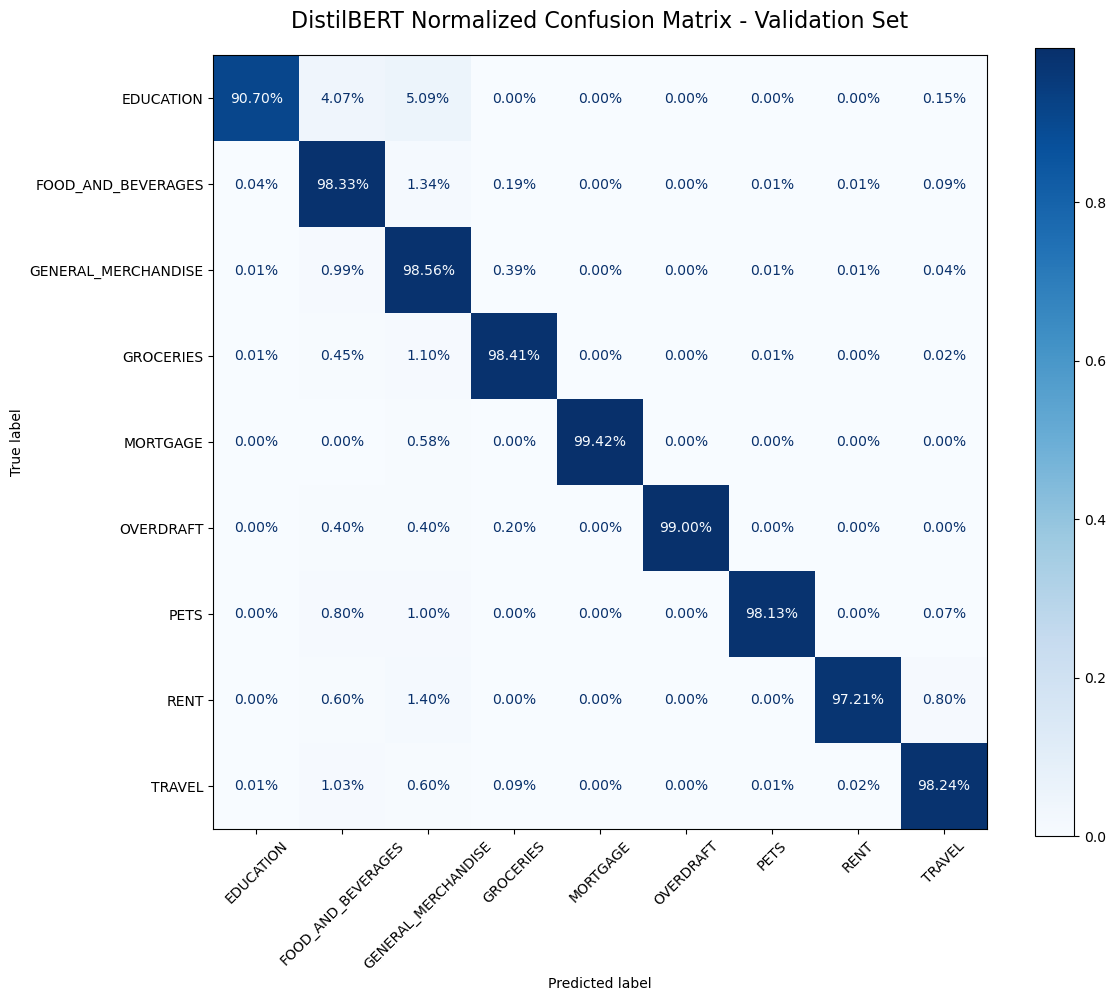


📊 Per-Category Performance:
                     precision    recall  f1-score   support

          EDUCATION     0.9383    0.9070    0.9224       688
 FOOD_AND_BEVERAGES     0.9855    0.9833    0.9844     78633
GENERAL_MERCHANDISE     0.9816    0.9856    0.9836     84491
          GROCERIES     0.9861    0.9841    0.9851     35224
           MORTGAGE     1.0000    0.9942    0.9971       173
          OVERDRAFT     0.9960    0.9900    0.9930       502
               PETS     0.9906    0.9813    0.9859      1500
               RENT     0.9625    0.9721    0.9672       501
             TRAVEL     0.9887    0.9824    0.9855      9918

           accuracy                         0.9841    211630
          macro avg     0.9810    0.9756    0.9783    211630
       weighted avg     0.9841    0.9841    0.9841    211630



In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on validation set
val_predictions = trainer.predict(val_dataset)
y_pred = np.argmax(val_predictions.predictions, axis=1)
y_true = val_labels.values  # or just val_labels if it's already numpy array

# Create NORMALIZED confusion matrix (percentages by row)
cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized, 
    display_labels=label_encoder.classes_
)
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', values_format='.2%')
plt.title('DistilBERT Normalized Confusion Matrix - Validation Set', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print detailed per-category breakdown
print("\n📊 Per-Category Performance:")
from sklearn.metrics import classification_report
print(classification_report(
    y_true, 
    y_pred, 
    target_names=label_encoder.classes_,
    digits=4
))

In [82]:
labels = df['category'].astype('category').cat.codes
print("Unique encoded labels:", sorted(labels.unique()))
print("Number of unique labels:", len(labels.unique()))
print("Categories:", list(df['category'].astype('category').cat.categories))


Unique encoded labels: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of unique labels: 9
Categories: ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE', 'OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']


In [83]:
num_labels = len(df['category'].unique())
model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels
)


NameError: name 'AutoModelForSequenceClassification' is not defined

In [ ]:
y_pred = model_finbert.predict(out_test_tfidf)

In [ ]:
# y_pred_finbert = model_finbert.predict(out_test_tfidf)

In [ ]:
# finbert = FinbertEmbedding() # also gets errors 
# ValueError: Paths are no longer accepted as the `fname` argument.

In [ ]:
model_finbert.predict(out_test_tfidf)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Aside from accuracy, we are also interested in evaluating our model with the **F1 Macro** metric, which calculates the F1 score equally for each class and averages them. This allows us to treat each class equally, which is important in this scenario since categories that appear less frequently, such as Mortgage and Rent, are just as important to correctly categorize as groups that appear very often, such as General Merchandise and Food and Beverages. The F1 Macro metric also handles class imbalance well. Accuracy may be misleading since our dataset is primarily dominated by education and food, and other categories are disproportionately represented.  

In [ ]:
out_train_df_modified['category'].value_counts(normalize=True)

#### Checkpoint Plan

> As your report checkpoint, you will submit the title, abstract, and introduction sections of your report. Note that your introduction itself will have three sections – an introductory paragraph, a literature review and discussion of prior work, and a description of relevant data. Intuitively, your checkpoint should contain a summary of the problem you are working on this quarter, with some context on why it’s interesting, along with anything your mentor wants you to include.

* Abstract -- Ellie
* Introduction
  * Intro Paragraph -- Ellie
  * Literature Review + Prior Work -- Jasmine
  * Relevant Data (describe datasets; inflows + outflows) -- David, Jasmine
* Summary of Problem
  * Why It's Interesting -- David
  * Anything else Kyle wants (?)
    * Ask Kyle about this tomorrow!

Other Notes:
* David + Ellie will further clean up the data; will make a new cleaned GitHub for the public! :)